Importação das bibliotecas necessárias

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from pycaret.classification import *

Importação dos dados de treino e teste

In [3]:
df_treino_bruto = pd.read_csv('treino.csv')
df_teste_bruto = pd.read_csv('teste.csv')

Cópia dos dataframes de treino e teste para posterior preparo

In [4]:
df_treino = df_treino_bruto.copy()
df_teste = df_teste_bruto.copy()

Retirada do símbolo % e conversão do tipo de dados da coluna RDS para tipo numérico

In [5]:
df_treino = df_treino.replace ( regex = '%', value = '', inplace = False )
df_treino['RDS'] = pd.to_numeric(df_treino['RDS'])

df_teste = df_teste.replace ( regex = '%', value = '', inplace = False )
df_teste['RDS'] = pd.to_numeric(df_teste['RDS'])

Tratamentos dos valores nulos, optei por substituir os nulos por médias agrupadas por finalidade do empréstimo e classe de emprego

In [7]:


df_treino_medias_medianas = df_treino.copy()


In [13]:
df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'TempoEmprego' ].mean()

Finalidade  Emprego     
Diversas    Autônomo         7.110465
            Comissionado     6.711818
            Geral            7.777310
            Gerente          9.662662
            Outros           9.885357
            Professional     9.229352
Reforma     Autônomo         7.588235
            Comissionado     4.125000
            Geral           12.271591
            Gerente          9.116514
            Outros          10.012963
            Professional     9.801815
Name: TempoEmprego, dtype: float64

In [16]:
df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'Negativos' ].mean()

Finalidade  Emprego     
Diversas    Autônomo        0.238095
            Comissionado    0.214286
            Geral           0.127168
            Gerente         0.325581
            Outros          0.230769
            Professional    0.178908
Reforma     Autônomo        0.148148
            Comissionado    1.166667
            Geral           0.140541
            Gerente         0.313725
            Outros          0.271605
            Professional    0.108434
Name: Negativos, dtype: float64

In [19]:
df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'Atrasos' ].mean()

Finalidade  Emprego     
Diversas    Autônomo        0.627907
            Comissionado    0.189655
            Geral           0.528249
            Gerente         0.443730
            Outros          0.404353
            Professional    0.382625
Reforma     Autônomo        0.648148
            Comissionado    0.000000
            Geral           0.238095
            Gerente         0.761468
            Outros          0.368932
            Professional    0.342742
Name: Atrasos, dtype: float64

In [23]:
df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'RDS' ].mean()

Finalidade  Emprego     
Diversas    Autônomo        35.946429
            Comissionado    37.282979
            Geral           33.825890
            Gerente         35.403019
            Outros          34.948077
            Professional    32.802632
Reforma     Autônomo        38.223913
            Comissionado    37.425000
            Geral           33.315476
            Gerente         36.980769
            Outros          33.021069
            Professional    31.812500
Name: RDS, dtype: float64

In [24]:
df_treino_medias_medianas["TempoEmprego"] = df_treino_medias_medianas["TempoEmprego"].fillna( df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'TempoEmprego' ].transform('mean') )

df_treino_medias_medianas["Negativos"] = df_treino_medias_medianas["Negativos"].fillna( df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'Negativos' ].transform('mean') )

df_treino_medias_medianas["Atrasos"] = df_treino_medias_medianas["Atrasos"].fillna( df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'Atrasos' ].transform('mean') )

df_treino_medias_medianas["RDS"] = df_treino_medias_medianas["RDS"].fillna( df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'RDS' ].transform('mean') )

In [25]:
df_teste["TempoEmprego"] = df_teste["TempoEmprego"].fillna( df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'TempoEmprego' ].transform('mean') )

df_teste["Negativos"] = df_teste["Negativos"].fillna( df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'Negativos' ].transform('mean') )

df_teste["Atrasos"] = df_teste["Atrasos"].fillna( df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'Atrasos' ].transform('mean') )

df_teste["RDS"] = df_teste["RDS"].fillna( df_treino_medias_medianas.groupby(['Finalidade', 'Emprego'])[ 'RDS' ].transform('mean') )

Codificação das colunas categóricas

In [28]:
novas_colunas_emprego = pd.get_dummies(df_treino_medias_medianas['Emprego'], drop_first=True, prefix = 'emprego')
novas_colunas_emprego


,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
3295,0,0,0,0,1
3296,0,0,0,0,0
3297,0,0,0,0,1
3298,0,0,0,0,1


In [29]:
novas_colunas_finalidade = pd.get_dummies(df_treino_medias_medianas['Finalidade'], drop_first=True, prefix = 'finalidade')
novas_colunas_finalidade

,finalidade_Reforma
0,1
1,0
2,1
3,0
4,0
...,...
3295,0
3296,1
3297,0
3298,1


In [30]:
df_treino_medias_medianas['emprego_Comissionado'] = novas_colunas_emprego['emprego_Comissionado']
df_treino_medias_medianas['emprego_Geral'] = novas_colunas_emprego['emprego_Geral']
df_treino_medias_medianas['emprego_Gerente'] = novas_colunas_emprego['emprego_Gerente']
df_treino_medias_medianas['emprego_Outros'] = novas_colunas_emprego['emprego_Outros']
df_treino_medias_medianas['emprego_Professional'] = novas_colunas_emprego['emprego_Professional']

df_treino_medias_medianas['finalidade_Reforma'] = novas_colunas_finalidade['finalidade_Reforma']

df_treino_medias_medianas = df_treino_medias_medianas.drop(['Emprego', 'Finalidade'], axis = 'columns')

df_treino_medias_medianas

,Cliente,Empréstimo,ValorDoBem,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional,finalidade_Reforma
0,bom pagador,19468.0,309447.00,0.50,0.0,1.0,185.6,0.0,33.0,39.200000,0,0,0,1,0,1
1,bom pagador,91688.0,449020.00,15.25,0.0,0.0,234.5,1.0,41.0,34.948077,0,0,0,1,0,0
2,bom pagador,34226.0,164394.70,1.25,0.0,0.0,250.5,0.0,10.0,37.200000,0,0,0,1,0,1
3,bom pagador,48356.0,270592.64,2.25,1.0,0.0,230.4,3.0,26.0,29.000000,0,0,0,1,0,0
4,bom pagador,64684.0,78167.16,3.75,0.0,0.0,93.6,0.0,18.0,21.000000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,bom pagador,109586.0,547951.98,17.75,0.0,0.0,112.7,1.0,17.0,29.700000,0,0,0,0,1,0
3296,bom pagador,161396.0,250917.40,13.50,1.0,0.0,171.9,0.0,20.0,25.300000,0,0,0,0,0,1
3297,bom pagador,106760.0,531818.66,15.00,0.0,0.0,113.7,0.0,17.0,27.000000,0,0,0,0,1,0
3298,mau pagador,78500.0,525950.00,14.75,2.0,4.0,200.3,2.0,27.0,31.812500,0,0,0,0,1,1


In [31]:
novas_colunas_emprego = pd.get_dummies(df_teste['Emprego'], drop_first=True, prefix = 'emprego')
novas_colunas_emprego


,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
1695,0,0,0,0,1
1696,0,1,0,0,0
1697,0,0,0,0,1
1698,0,0,0,1,0


In [32]:
novas_colunas_finalidade = pd.get_dummies(df_teste['Finalidade'], drop_first=True, prefix = 'finalidade')
novas_colunas_finalidade

,finalidade_Reforma
0,0
1,0
2,1
3,1
4,0
...,...
1695,0
1696,1
1697,1
1698,0


In [33]:
df_teste['emprego_Comissionado'] = novas_colunas_emprego['emprego_Comissionado']
df_teste['emprego_Geral'] = novas_colunas_emprego['emprego_Geral']
df_teste['emprego_Gerente'] = novas_colunas_emprego['emprego_Gerente']
df_teste['emprego_Outros'] = novas_colunas_emprego['emprego_Outros']
df_teste['emprego_Professional'] = novas_colunas_emprego['emprego_Professional']

df_teste['finalidade_Reforma'] = novas_colunas_finalidade['finalidade_Reforma']

df_teste = df_teste.drop(['Emprego', 'Finalidade'], axis = 'columns')

df_teste

,Empréstimo,ValorDoBem,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional,finalidade_Reforma
0,82582.0,342542.60,8.00,0.000000,0.0,407.7,0.0,43.0,41.300000,0,1,0,0,0,0
1,37680.0,233000.56,6.00,0.000000,0.0,100.3,2.0,14.0,25.500000,0,1,0,0,0,0
2,58404.0,218578.54,2.75,0.000000,0.0,133.1,0.0,17.0,34.700000,0,1,0,0,0,1
3,33284.0,255630.54,15.75,0.000000,0.0,239.8,1.0,35.0,36.700000,0,0,0,1,0,1
4,66882.0,315629.66,7.00,0.178908,0.0,101.4,1.0,18.0,34.000000,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,39250.0,316549.68,10.75,2.000000,0.0,184.4,1.0,30.0,28.400000,0,0,0,0,1,0
1696,27632.0,124689.40,0.75,0.000000,0.0,106.9,1.0,30.0,36.300000,0,1,0,0,0,1
1697,43960.0,331904.28,8.75,0.000000,0.0,259.4,1.0,12.0,35.900000,0,0,0,0,1,1
1698,47100.0,459853.00,18.00,0.000000,1.0,258.2,1.0,28.0,35.403019,0,0,0,1,0,0


Balanceamento do conjunto de dados

In [6]:
df_treino.groupby(['Cliente']).count()

,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
Cliente,,,,,,,,,,,
bom pagador,2686,2686,2686,2686,2525,2525,2596,2686,2686,2686,2431
mau pagador,614,614,614,614,597,597,602,614,614,614,216


In [2]:
ada = SMOTE ( random_state=42, sampling_strategy = 'all', k_neighbors = 9 )

In [45]:
x = df_treino_medias_medianas.drop(['Cliente'], axis = 'columns')
x

,Empréstimo,ValorDoBem,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional,finalidade_Reforma
0,19468.0,309447.00,0.50,0.0,1.0,185.6,0.0,33.0,39.200000,0,0,0,1,0,1
1,91688.0,449020.00,15.25,0.0,0.0,234.5,1.0,41.0,34.948077,0,0,0,1,0,0
2,34226.0,164394.70,1.25,0.0,0.0,250.5,0.0,10.0,37.200000,0,0,0,1,0,1
3,48356.0,270592.64,2.25,1.0,0.0,230.4,3.0,26.0,29.000000,0,0,0,1,0,0
4,64684.0,78167.16,3.75,0.0,0.0,93.6,0.0,18.0,21.000000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,109586.0,547951.98,17.75,0.0,0.0,112.7,1.0,17.0,29.700000,0,0,0,0,1,0
3296,161396.0,250917.40,13.50,1.0,0.0,171.9,0.0,20.0,25.300000,0,0,0,0,0,1
3297,106760.0,531818.66,15.00,0.0,0.0,113.7,0.0,17.0,27.000000,0,0,0,0,1,0
3298,78500.0,525950.00,14.75,2.0,4.0,200.3,2.0,27.0,31.812500,0,0,0,0,1,1


In [46]:
y = df_treino_medias_medianas['Cliente']
y

0       bom pagador
1       bom pagador
2       bom pagador
3       bom pagador
4       bom pagador
           ...     
3295    bom pagador
3296    bom pagador
3297    bom pagador
3298    mau pagador
3299    bom pagador
Name: Cliente, Length: 3300, dtype: object

In [47]:
x_res, y_res = ada.fit_resample(x, y)

In [48]:
y_res.value_counts()

bom pagador    2686
mau pagador    2686
Name: Cliente, dtype: int64

Início dos treinos dos modelos

In [49]:
s = setup ( x_res, target = y_res, session_id = 433, fix_imbalance = False, fix_imbalance_method = 'ADASYN', fold = 20, train_size = 0.8 )

Comparação dos modelos pela métrica F1

In [50]:
best = compare_models ( probability_threshold = 0.42, sort = 'F1' )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:52:16
Status,. . . . . . . . . . . . . . . . . .,Fitting 20 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Checagem do limiar de probabilidade ideal para maximizar o valor da métrica escolhida

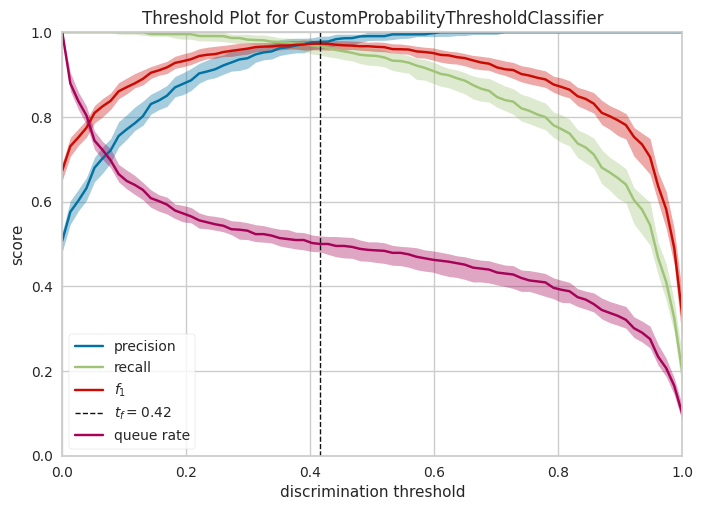

In [51]:
plot_model ( best, plot = 'threshold' )

Checagem da matriz de confusão

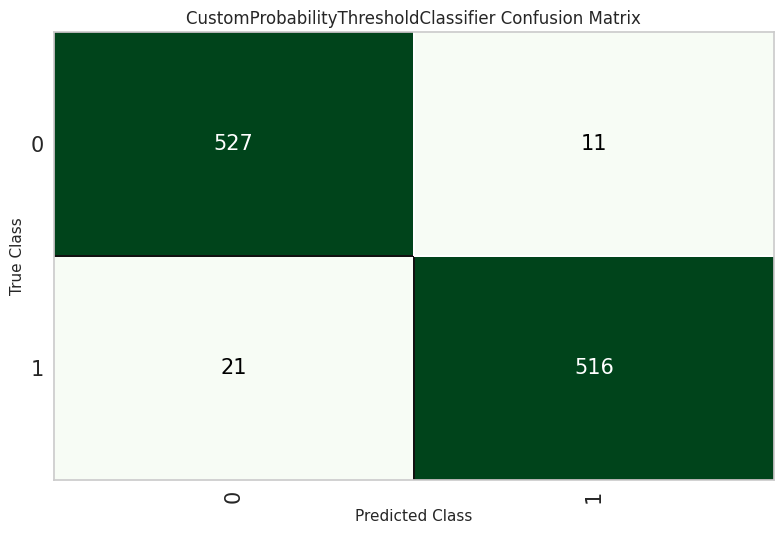

In [52]:
plot_model(best, plot = 'confusion_matrix') # 0.42

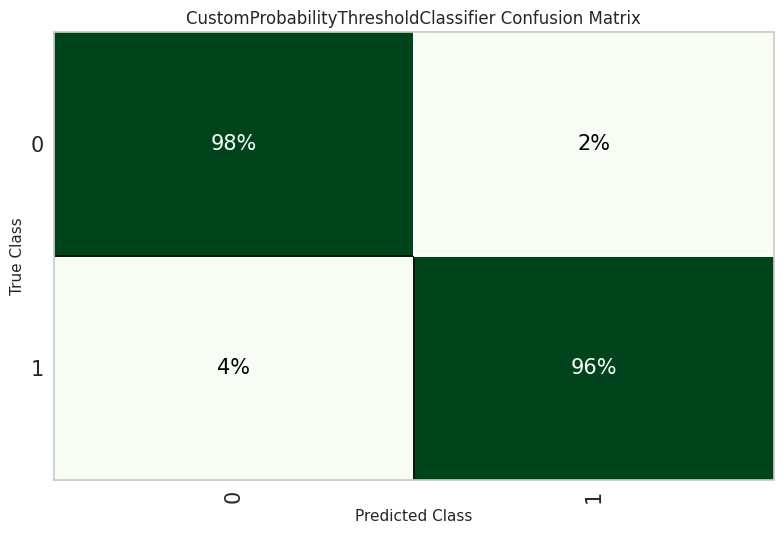

In [53]:
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True}) # 0.34

Criação das predições

In [55]:
submissao = pd.DataFrame()
submissao['Cliente'] = predict_model ( best, data = df_teste )['prediction_label']
submissao

,Cliente
0,bom pagador
1,bom pagador
2,bom pagador
3,bom pagador
4,bom pagador
...,...
1695,bom pagador
1696,bom pagador
1697,bom pagador
1698,bom pagador


In [56]:
submissao.to_csv('submissao-09.csv', index = False)